In [1]:
SEED = 123

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
np.random.seed(seed=SEED)

In [4]:
df_diabetes_all = pd.read_csv("/Users/udasatap/Documents/AI ML DS/ensemble/diabetes_prediction/data/diabetes_dataset.csv")

In [5]:
df_diabetes_all.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df_diabetes_all.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
rows_all, columns_all = df_diabetes_all.shape
rows_all

768

In [8]:
df_no_diabetes = df_diabetes_all[df_diabetes_all['Outcome'] == 0]
df_no_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [9]:
rows_no_diabetes, columns_no_diabetes = df_no_diabetes.shape
rows_no_diabetes

500

In [10]:
df_yes_diabetes = df_diabetes_all[df_diabetes_all['Outcome'] == 1]
df_yes_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [11]:
rows_yes_diabetes, columns_yes_diabetes = df_yes_diabetes.shape
rows_yes_diabetes

268

In [12]:
# select random indexes from no_diabetes and match the yes_diabetes size
indexes = np.random.choice(rows_no_diabetes - 1, size=rows_yes_diabetes, replace=False)
print(indexes)
df_no_diabetes_sample = df_no_diabetes.iloc[indexes, :] # match the yes_diabetes size

[ 85 309  59 221 131   5 114 423 288 101  36 276 184  11  82 170 419 159
 415 107 200 284 488  48 203 335 248  34 471 175 388 438  72 258 493 196
  33 308 138   9 469  93 478 285 223 189  24 363 179 125  13 434 472 263
 326 211  55  75 280 134 383 439  15 150 132 171 369 378 102  26 182 367
 316 156  49 429 368 400 160 436 292 337 327 385  66 417 185 291 352 275
  42 318  41 142 351 475 460 341 212 120  95  54 456 447 345 370 298 336
 236 459 209   0 401 227 151 381 192 190 266  20 164 329 467 364 237 181
 204 410 404 343 497 282 426  31 277  21 477 295 273 299  79 188 246 121
 402  91 148 172 465 403  52 453 487 162 155 252 104 458 328 413 405 249
 199 449 356   6 147 454 375 202 293 389 178 313 433 320 242 216 286 165
 234 274 437  38 264 191 231  12 428 495  30 144 391 201 157 306 241 462
 479 346 229  81 105 372 226  37  19  29  78 448 408 442 463  71  94 491
 484  35 128  74 217  53  22 173 145 427 406 166 347 163 267  90 395 210
 441 494 416 272 480 396   4 333 218 239 235 461 26

In [13]:
df_no_diabetes_sample.shape

(268, 9)

In [14]:
df_diabetes_all_sample = pd.concat([df_yes_diabetes, df_no_diabetes_sample])
df_diabetes_all_sample.shape

(536, 9)

In [15]:
# divide into X and y
X = df_diabetes_all_sample.iloc[:, :-1].to_numpy()

In [16]:
# divide into X and y
y = df_diabetes_all_sample.iloc[:, -1].to_numpy()

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance

In [18]:
# define custom class to fix bug in xgboost 1.0.2
# bug was: KeyError: 'weight'
class XGBClassifier__(XGBClassifier):
	@property
	def coef_(self):
		return None

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

In [20]:
xgbClassifier = XGBClassifier__(random_state=SEED)
xgbClassifier.fit(X_train, y_train)
cv_xgb = cross_val_score(xgbClassifier, X_test, y_test, cv=10)
cv_xgb.mean()

0.6703296703296703

In [21]:
import numpy as np
example = np.array([[5, 121, 72, 23, 112, 26.2, 0.245, 30]])
has_diabetes = xgbClassifier.predict(example)
has_diabetes_proba = xgbClassifier.predict_proba(example)
print(has_diabetes)
print(has_diabetes_proba)

[0]
[[0.9820041  0.01799589]]


In [22]:
from sklearn.feature_selection import SelectFromModel
from matplotlib import pyplot

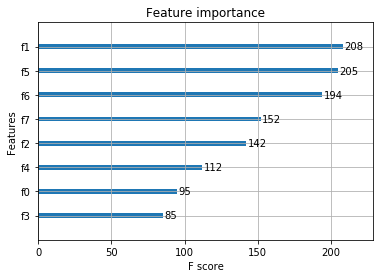

In [23]:
# show feature importance in descending order
plot_importance(xgbClassifier)
pyplot.show()

In [24]:
feature_importance_thresholds = np.sort(xgbClassifier.feature_importances_)

In [25]:
for threshold in feature_importance_thresholds:
    selected_model = SelectFromModel(xgbClassifier, threshold=threshold, prefit=True)
    X_train_selected = selected_model.transform(X_train)
    X_test_selected = selected_model.transform(X_test)
    xgbClassifier_selected = XGBClassifier(random_state=SEED)
    xgbClassifier_selected.fit(X_train_selected, y_train)
    cv_xgb_selected = cross_val_score(xgbClassifier_selected, X_test_selected, y_test, cv=10)
    print("Threshold: {0}, CV Score: {1}".format(threshold, cv_xgb_selected.mean()))

Threshold: 0.07619652897119522, CV Score: 0.6703296703296703
Threshold: 0.07871794700622559, CV Score: 0.6417582417582418
Threshold: 0.091267429292202, CV Score: 0.6928571428571428
Threshold: 0.09138333052396774, CV Score: 0.6923076923076923
Threshold: 0.11023987084627151, CV Score: 0.7071428571428571
Threshold: 0.11200624704360962, CV Score: 0.7236263736263735
Threshold: 0.15652121603488922, CV Score: 0.6692307692307692
Threshold: 0.2836674451828003, CV Score: 0.5884615384615385
